In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.svm as svm
import numpy as np
import arff
import scipy
import time
import itertools

# Machine learning method for classification 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Feature engineering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import f_classif,chi2
from sklearn.feature_selection import SelectPercentile

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score

#load the arff data
train_dataset = arff.load(open('/Users/bowenhuang/OneDrive/UniMelb/17Sem1/Knowledge Tech/Project2/2017S1-KTproj2-data/train.arff'))
dev_dataset = arff.load(open('/Users/bowenhuang/OneDrive/UniMelb/17Sem1/Knowledge Tech/Project2/2017S1-KTproj2-data/dev.arff'))
test_dataset = arff.load(open('/Users/bowenhuang/OneDrive/UniMelb/17Sem1/Knowledge Tech/Project2/2017S1-KTproj2-data/test.arff'))

#load raw trainning data
raw_train_t = pd.read_table('/Users/bowenhuang/OneDrive/UniMelb/17Sem1/Knowledge Tech/Project2/2017S1-KTproj2-data/train-tweets.txt',header = None,usecols = [0,1])
raw_train_t.columns = ['ID','Tweet']
raw_train_l = pd.read_table('/Users/bowenhuang/OneDrive/UniMelb/17Sem1/Knowledge Tech/Project2/2017S1-KTproj2-data/train-labels.txt',header = None,usecols = [0,1])
raw_train_l.columns = ['ID','Label']
train_df = pd.merge(raw_train_t,raw_train_l,on='ID')
#train_df.head

#load raw test data
raw_test_t = pd.read_table('/Users/bowenhuang/OneDrive/UniMelb/17Sem1/Knowledge Tech/Project2/2017S1-KTproj2-data/dev-tweets.txt',header = None,usecols = [0,1])
raw_test_t.columns = ['ID','Tweet']
raw_test_l = pd.read_table('/Users/bowenhuang/OneDrive/UniMelb/17Sem1/Knowledge Tech/Project2/2017S1-KTproj2-data/dev-labels.txt',header = None,usecols = [0,1])
raw_test_l.columns = ['ID','Label']
test_df = pd.merge(raw_test_t,raw_test_l,on='ID')
#test_df.head


# get the trainning and test data 
train_data_vector = np.array(train_dataset['data'])
X_train = scipy.delete(train_data_vector,0,1)
X_train = scipy.delete(X_train,-1,1)
y_train = train_data_vector[:,-1]

test_data_vector = np.array(dev_dataset['data'])
X_test = scipy.delete(test_data_vector,0,1)
X_test = scipy.delete(X_test,-1,1)
y_test = test_data_vector[:,-1]

In [2]:
#Define a name vector used in this experiment
names = ["Naive Bayes","RBF SVM",
         "Decision Tree", "Random Forest"
]
# Define a class names vector
class_names = ['positive','neutral','negative']
#Define a function for apply different machine learning method
def getResultofAlgo(classifiers_ml, X_train, y_train, X_test, y_test):
    import time
    result_ml = pd.DataFrame()
    for name,clf in zip(names,classifiers_ml):
        s = time.time()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test,y_pred)
        score = precision_recall_fscore_support(y_test,y_pred,average='macro')
        #plt.figure()
        #plot_confusion_matrix(cm,classes = class_names,title = str(name))
        print(cm)
        e = time.time()
        print("Time : "+str(e-s)+", Name : "+name+", Score : "+str(score))

        #plt.show()
    return result_ml


#Define a function for plot a visible confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
classifiers_given = [
    GaussianNB(),
    SVC(gamma=10, C=1.29),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1)
]
getResultofAlgo(classifiers_given,np.asarray(X_train).astype(float),y_train,np.asarray(X_test).astype(float),y_test)

Empty DataFrame
Columns: []
Index: []

[[ 245  713   80]
 [ 165 2026  209]
 [  60  880  548]]
Time : 1.588914155960083, Name : Random Forest, Score : (0.57860632889230468, 0.48282568835850581, 0.48984435498604112, None)


[[ 243  731   64]
 [ 198 2017  185]
 [  89  918  481]]
Time : 0.364469051361084, Name : Decision Tree, Score : (0.55586187314491398, 0.46592446702716139, 0.46956372973220467, None)


[[ 124  676  238]
 [ 108 1933  359]
 [  34  798  656]]
Time : 66.6706190109253, Name : RBF SVM, Score : (0.51902340802806635, 0.45524579422794043, 0.44486323608879447, None)


[[ 312  538  188]
 [ 226 1545  629]
 [  48  566  874]]
Time : 0.18983006477355957, Name : Naive Bayes, Score : (0.54417203295759708, 0.51056454202664348, 0.51536575865414913, None)


In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest
# Feature engineering from raw tweet
# Vectorize tweet by word count
classifiers_given = [
    GaussianNB(),
    SVC(gamma=10, C=1.29),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1)
]
cv = CountVectorizer(min_df = 0.00001,stop_words = 'english',analyzer='word')
train_X_Miko = cv.fit_transform(train_df.Tweet)
test_X_Miko = cv.transform(test_df.Tweet)

tf_fea = TfidfTransformer()
train_X_TfFS = tf_fea.fit_transform(train_X_Miko)
test_X_TfFS = tf_fea.transform(test_X_Miko)

# Feature selection by chi2, select 0.2% of features 
skb02 = SelectKBest(score_func=chi2,k=200)
train_X = skb02.fit_transform(train_X_Miko,train_df.Label)
test_X = skb02.transform(test_X_Miko)


getResultofAlgo(classifiers_given,train_X,train_df.Label,test_X,test_df.Label)

Empty DataFrame
Columns: []
Index: []

[[ 348  629   58]
 [ 227 1915  255]
 [  37  770  675]]
Time : 9.570441007614136, Name : Random Forest, Score : (0.60989245682432103, 0.53020426063589288, 0.54659361362650616, None)


[[ 356  615   64]
 [ 267 1874  256]
 [  68  808  606]]
Time : 2.5437278747558594, Name : Decision Tree, Score : (0.57933950862979933, 0.51155961060905175, 0.5246911613072095, None)


[[ 144  863   28]
 [ 117 2138  142]
 [  16 1188  278]]
Time : 387.02439403533936, Name : RBF SVM, Score : (0.55025854996383894, 0.40622101631028701, 0.38561703141565323, None)


[[ 478   72  485]
 [ 363  162 1872]
 [  61   25 1396]]
Time : 0.15739703178405762, Name : Naive Bayes, Score : (0.50912839934305687, 0.49046351326146148, 0.38295600229173443, None)


In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest
classifiers_given = [
    GaussianNB(),
    SVC(gamma=10, C=1.29),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1)
]
cv = CountVectorizer(min_df = 0.00001,stop_words = 'english',analyzer='word')
train_X_Miko = cv.fit_transform(train_df.Tweet)
test_X_Miko = cv.transform(test_df.Tweet)

tf_fea = TfidfTransformer()
train_X_TfFS = tf_fea.fit_transform(train_X_Miko)
test_X_TfFS = tf_fea.transform(test_X_Miko)

skb02 = SelectKBest(score_func=chi2,k=46)
train_X = skb02.fit_transform(train_X_Miko,train_df.Label)
test_X = skb02.transform(test_X_Miko)


getResultofAlgo(classifiers_given,train_X.toarray().astype(float),train_df.Label,test_X.toarray().astype(float),test_df.Label)

Empty DataFrame
Columns: []
Index: []

[[ 248  741   46]
 [ 135 2118  144]
 [  29  942  511]]
Time : 1.4695889949798584, Name : Random Forest, Score : (0.62937405394725132, 0.48934078356353911, 0.49812917101258264, None)


[[ 212  729   94]
 [ 132 2095  170]
 [  28  926  528]]
Time : 48.32808709144592, Name : RBF SVM, Score : (0.59840860215053759, 0.47837179988582057, 0.48245455173247209, None)
[[ 252  741   42]
 [ 144 2113  140]
 [  34  954  494]]
Time : 0.1675570011138916, Name : Decision Tree, Score : (0.62390006539288345, 0.4861100530252187, 0.49430742913183973, None)


[[ 275  653  107]
 [ 162 1720  515]
 [  32  659  791]]
Time : 0.06376099586486816, Name : Naive Bayes, Score : (0.57114603550641774, 0.50566743197262465, 0.51526169630569563, None)


Empty DataFrame
Columns: []
Index: []

[[ 247  741   47]
 [ 141 2110  146]
 [  28  943  511]]
Time : 1.4739761352539062, Name : Random Forest, Score : (0.62524784947524803, 0.48790622063362871, 0.49653669172611475, None)


[[ 212  729   94]
 [ 132 2095  170]
 [  28  926  528]]
Time : 52.98708891868591, Name : RBF SVM, Score : (0.59840860215053759, 0.47837179988582057, 0.48245455173247209, None)
[[ 251  742   42]
 [ 145 2113  139]
 [  34  953  495]]
Time : 0.17452192306518555, Name : Decision Tree, Score : (0.62361796824137672, 0.48601291311114519, 0.49416129458050762, None)


[[ 275  653  107]
 [ 162 1720  515]
 [  32  659  791]]
Time : 0.07051396369934082, Name : Naive Bayes, Score : (0.57114603550641774, 0.50566743197262465, 0.51526169630569563, None)


In [7]:
fe = np.asarray(cv.get_feature_names())[skb02.get_support()]
print(fe)
train_dataset['attributes']

[('id', 'NUMERIC'),
 ('a', 'NUMERIC'),
 ('amazing', 'NUMERIC'),
 ('antman', 'NUMERIC'),
 ('are', 'NUMERIC'),
 ('at', 'NUMERIC'),
 ('awesome', 'NUMERIC'),
 ('best', 'NUMERIC'),
 ('birthday', 'NUMERIC'),
 ('cant', 'NUMERIC'),
 ('cream', 'NUMERIC'),
 ('day', 'NUMERIC'),
 ('death', 'NUMERIC'),
 ('drone', 'NUMERIC'),
 ('excited', 'NUMERIC'),
 ('fake', 'NUMERIC'),
 ('fuck', 'NUMERIC'),
 ('fucking', 'NUMERIC'),
 ('good', 'NUMERIC'),
 ('great', 'NUMERIC'),
 ('gucci', 'NUMERIC'),
 ('happy', 'NUMERIC'),
 ('hate', 'NUMERIC'),
 ('i', 'NUMERIC'),
 ('ice', 'NUMERIC'),
 ('im', 'NUMERIC'),
 ('is', 'NUMERIC'),
 ('leftists', 'NUMERIC'),
 ('liberals', 'NUMERIC'),
 ('love', 'NUMERIC'),
 ('my', 'NUMERIC'),
 ('national', 'NUMERIC'),
 ('nazi', 'NUMERIC'),
 ('night', 'NUMERIC'),
 ('not', 'NUMERIC'),
 ('obama', 'NUMERIC'),
 ('people', 'NUMERIC'),
 ('racist', 'NUMERIC'),
 ('see', 'NUMERIC'),
 ('shit', 'NUMERIC'),
 ('so', 'NUMERIC'),
 ('stupid', 'NUMERIC'),
 ('supremacists', 'NUMERIC'),
 ('th', 'NUMERIC'),
 ('th

['alt' 'amazing' 'ant' 'anti' 'awesome' 'best' 'birthday' 'conservatives'
 'cream' 'day' 'death' 'dog' 'drone' 'excited' 'fake' 'friday' 'fuck' 'fun'
 'good' 'great' 'happy' 'hate' 'hot' 'http' 'https' 'ice' 'killed'
 'leftists' 'liberals' 'love' 'muslims' 'national' 'nazi' 'night' 'obama'
 'people' 'racist' 'rightists' 'shit' 'stupid' 'supremacists' 'thank'
 'tomorrow' 'trump' 'wait' 'worst']


In [9]:
given.shape

(46,)

In [5]:
#features by tfidf vectorizer
np.asarray(tf.get_feature_names())[skb02_Tf.get_support()]

array(['alt', 'amazing', 'ant', 'anti', 'ass', 'awesome', 'band',
       'beautiful', 'best', 'birthday', 'bitch', 'bless', 'boko', 'brown',
       'celebrate', 'conservatives', 'cream', 'day', 'death', 'dog',
       'drone', 'enjoy', 'enjoyed', 'excited', 'fake', 'fantastic',
       'fantasticbeasts', 'fatty', 'favorite', 'fighters', 'foo', 'friday',
       'fuck', 'fucking', 'fun', 'good', 'great', 'happy', 'haram', 'hate',
       'hillary', 'hot', 'http', 'ice', 'idiot', 'incredible', 'ira',
       'jackson', 'janet', 'kill', 'killed', 'leftists', 'liberals',
       'lies', 'liked', 'love', 'loved', 'medicare', 'melania', 'muslims',
       'national', 'nazi', 'nazis', 'nice', 'night', 'obama', 'paper',
       'penalty', 'people', 'perfect', 'prince', 'racist', 'rightists',
       'shit', 'soros', 'stupid', 'sucks', 'supremacists', 'terrorist',
       'thank', 'thankyouobama', 'tomorrow', 'towns', 'trump', 'wait',
       'wars', 'worse', 'worst', 'yakub', 'zac'], 
      dtype='<U78')

In [6]:
test_X_TfFS.shape

(4914, 225225)

In [3]:
classifiers_given = [
    GaussianNB(),
    SVC(gamma=10, C=1.29),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1)
]
from sklearn.feature_extraction.text import TfidfTransformer
cv = CountVectorizer(min_df = 0.00001,stop_words = 'english',analyzer='word',ngram_range=(1,2))
train_X_Miko = cv.fit_transform(train_df.Tweet)
test_X_Miko = cv.transform(test_df.Tweet)



tf_fea = TfidfTransformer()
train_X_TfFS = tf_fea.fit_transform(train_X_Miko)
test_X_TfFS = tf_fea.transform(test_X_Miko)


In [23]:
p = [0.01,0.04,0.07,0.1,0.13,0.16,0.19,0.22,0.25,0.28,0.31,0.34,0.37,0.4,0.43,0.46,0.49,0.52,0.55,0.58,0.61,0.64,0.67,0.7]
svm = SVC(gamma=10, C=1.29)
res = []
for _ in p:
    skb02 = SelectPercentile(score_func=chi2,percentile = _)
    train_X = skb02.fit_transform(train_X_TfFS,train_df.Label)
    test_X = skb02.transform(test_X_TfFS)
    y_pred = svm.fit(train_X,train_df.Label).predict(test_X)
    res.append(precision_recall_fscore_support(y_pred,test_df.Label,average = 'macro'))
    print(res[-1])


(0.60657800433177556, 0.59993350867481265, 0.60241954124915464, None)


(0.6072846261984286, 0.6031325774415498, 0.60484727724765464, None)


(0.60814882065587328, 0.60487419293251443, 0.60607203399090837, None)


(0.60852006009683091, 0.60628914069924411, 0.60704554513608355, None)


(0.60774330714673763, 0.60725385287811628, 0.60707049587122874, None)


(0.60789081496831177, 0.61003124700371936, 0.60846814058996712, None)


(0.60550778196777344, 0.6096835528898138, 0.60705658999138123, None)


(0.60678834128140036, 0.6133938952092296, 0.60915933055681826, None)


(0.60600756242362031, 0.61559586459814408, 0.60970040589830621, None)


(0.60166679024261305, 0.61689798849141075, 0.60787163896553731, None)


(0.59957721686455834, 0.61876540898038135, 0.60731130987236781, None)


(0.59473419434068175, 0.61660034528647811, 0.60342426843647201, None)


(0.59458424355850481, 0.61983508845400037, 0.60436074440573639, None)


(0.5970611502168397, 0.62719636533203282, 0.60825921384306103, None)


(0.59609453663520107, 0.63131715788932974, 0.60859044630639048, None)


(0.59052595236440608, 0.63239505630197523, 0.60463217996583696, None)


(0.5866374289812627, 0.63807656785154476, 0.60258583485776551, None)


(0.57920901488690746, 0.6370865606299897, 0.59607706310096331, None)


(0.57311076836226982, 0.63501867082046159, 0.5901917400289457, None)


(0.5630877212238925, 0.63517922679294225, 0.58083758755543891, None)


(0.5620457071401187, 0.6449906935287123, 0.58084343397791172, None)


(0.54167871440348758, 0.64462081768008417, 0.55945051474630614, None)


(0.52297857881754239, 0.65386635560750239, 0.53774181780729147, None)


(0.44145228851025281, 0.6674013083366277, 0.41863235962786632, None)


In [24]:
y_pre = []
for i in range(len(res)):
    y_pre.append(res[i][0])
y_rec = []
for i in range(len(res)):
    y_rec.append(res[i][1])
y_fs = []
for i in range(len(res)):
    y_fs.append(res[i][2])

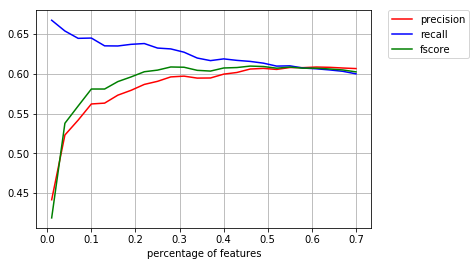

In [33]:
plt.figure()
plt1=plt.plot(p,y_pre,'r',Label='precision')
plt2=plt.plot(p,y_rec,'b',Label='recall')
plt3=plt.plot(p,y_fs,'g',Label='fscore')
plt.grid()
plt.xlabel("percentage of features")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("performance.png",bbox_inches='tight')
plt.show()

In [5]:
    skb02 = SelectPercentile(score_func=chi2,percentile = 0.46)
    train_X = skb02.fit_transform(train_X_TfFS,train_df.Label)
    test_X = skb02.transform(test_X_TfFS)
getResultofAlgo(classifiers_given,train_X.toarray(),train_df.Label,test_X.toarray(),test_df.Label)

Empty DataFrame
Columns: []
Index: []

[[ 370  531  134]
 [ 263 1619  515]
 [  40  597  845]]
Time : 56.011667013168335, Name : Random Forest, Score : (0.56824768521446645, 0.53436365971915267, 0.54353428067424259, None)


[[ 329  539  167]
 [ 317 1488  592]
 [ 104  603  775]]
Time : 36.55060696601868, Name : Decision Tree, Score : (0.50322041940215556, 0.48719744546937011, 0.49151878774539126, None)


[[ 589  368   78]
 [ 390 1627  380]
 [  64  573  845]]
Time : 1251.2339689731598, Name : RBF SVM, Score : (0.61559586459814408, 0.60600756242362031, 0.60970040589830621, None)


[[ 491  324  220]
 [ 313  784 1300]
 [  39  162 1281]]
Time : 0.7234699726104736, Name : Naive Bayes, Score : (0.55236771791343853, 0.55528137198560468, 0.51622434545185547, None)


In [8]:
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit
C_range = np.logspace(-1, 1, 10)
gamma_range = np.logspace(0, 2, 10)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid,n_jobs=-1,cv= cv)
grid.fit(train_X, train_df.Label)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))



KeyboardInterrupt: 

In [6]:
from sklearn.feature_selection import SelectKBest
skb2w = SelectKBest(score_func=chi2,k=20000)
tX = skb2w.fit_transform(train_X_TfFS,train_df.Label)
teX = skb2w.transform(test_X_TfFS)
 

In [7]:
svd = TruncatedSVD(n_components=100,random_state=42)
train_X_svd = svd.fit_transform(tX)
test_X_svd = svd.transform(teX)

svd.explained_variance_ratio_.sum()

0.19744656136904734

In [8]:
getResultofAlgo(classifiers_given,train_X_svd,train_df.Label,test_X_svd,test_df.Label)

Empty DataFrame
Columns: []
Index: []

[[ 281  631  123]
 [ 202 1739  456]
 [  42  646  794]]
Time : 10.40593695640564, Name : Random Forest, Score : (0.56337510333831009, 0.51091675458346619, 0.51966694078113917, None)


[[ 381  447  207]
 [ 575 1139  683]
 [ 220  597  665]]
Time : 3.1337649822235107, Name : Decision Tree, Score : (0.42446379071282725, 0.43067039857049111, 0.42665083892031319, None)


[[ 260  701   74]
 [ 184 1905  308]
 [  35  781  666]]
Time : 116.57085585594177, Name : RBF SVM, Score : (0.58024610642078844, 0.49844795710193823, 0.50955231225596143, None)


[[ 684   79  272]
 [1105  325  967]
 [ 413  118  951]]
Time : 0.11882400512695312, Name : Naive Bayes, Score : (0.45582621410813845, 0.47938537314301638, 0.38775546230461111, None)


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
#This block used for plot a figure for svd
cv_p = TfidfVectorizer(min_df = 0.00001,stop_words = 'english',analyzer='word',ngram_range=(1,2))
tX_svd = cv_p.fit_transform(train_df.Tweet[:5])


In [80]:
def plot_svd(matrix):
    plt.imshow(matrix, interpolation='nearest', cmap = plt.cm.Blues)
    plt.title("svd")
    plt.colorbar()
    plt.xlabel("features")
    plt.ylabel("tweets")
    plt.show()

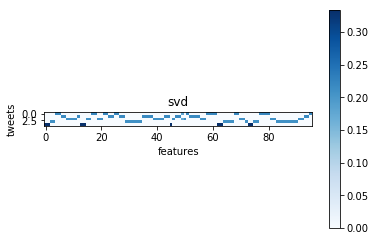

In [81]:
plot_svd(tX_svd.toarray())

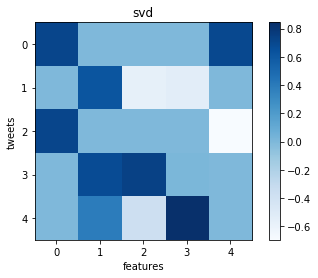

In [82]:
svd_p = TruncatedSVD(n_components=5)
tX_svd_a = svd_p.fit_transform(tX_svd)
plot_svd(tX_svd_a)

In [84]:
svd_p.explained_variance_ratio_.sum()

0.99999999999999978

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest
classifiers_given = [
    GaussianNB(),
    SVC(gamma=10, C=1.29),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1)
]
cv = CountVectorizer(min_df = 0.00001,stop_words = 'english',analyzer='word')
train_X_Miko = cv.fit_transform(train_df.Tweet)
test_X_Miko = cv.transform(test_df.Tweet)

tf_fea = TfidfTransformer()
train_X_TfFS = tf_fea.fit_transform(train_X_Miko)
test_X_TfFS = tf_fea.transform(test_X_Miko)

skb02 = SelectKBest(score_func=chi2,k=46)
train_X = skb02.fit_transform(train_X_Miko,train_df.Label)
test_X = skb02.transform(test_X_Miko)

svm = SVC(gamma = 10,C =1.29)
y_46 = svm.fit(train_X,train_df.Label).predict(test_X)

In [10]:
skb02 = SelectKBest(score_func=chi2,k=226)
train_X = skb02.fit_transform(train_X_Miko,train_df.Label)
test_X = skb02.transform(test_X_Miko)

y_226 = svm.fit(train_X,train_df.Label).predict(test_X)

In [14]:
y_226

array(['neutral', 'neutral', 'neutral', ..., 'negative', 'neutral',
       'neutral'], dtype=object)

In [15]:
y_46

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'positive'], dtype=object)

In [13]:
test_df.Tweet.shape

(4914,)

In [4]:
# generate test output

test_real = pd.read_table('/Users/bowenhuang/OneDrive/UniMelb/17Sem1/Knowledge Tech/Project2/2017S1-KTproj2-data/test-tweets.txt',header = None,usecols = [0,1])
test_real.columns = ['ID','Tweet']

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
cv = CountVectorizer(min_df = 0.00001,stop_words = 'english',analyzer='word',ngram_range=(1,2))
train_X_Miko = cv.fit_transform(train_df.Tweet)
test_X_Miko = cv.transform(test_real.Tweet)


tf_fea = TfidfTransformer()
train_X_TfFS = tf_fea.fit_transform(train_X_Miko)
test_X_TfFS = tf_fea.transform(test_X_Miko)


skb02 = SelectPercentile(score_func=chi2,percentile = 0.46)
train_X = skb02.fit_transform(train_X_TfFS,train_df.Label)
test_X = skb02.transform(test_X_TfFS)

svm = SVC(gamma=10, C=1.29)
y_pred = svm.fit(train_X,train_df.Label).predict(test_X)


In [6]:
y_pred.shape

(4924,)

In [7]:
test_real.ID.shape

(4924,)

In [13]:
actual = ["?" for _ in range(4924)]
error = ["" for _ in range(4924)]
prediction = ["" for _ in range(4924)]
r= {'actual':actual,'predicted':y_pred,'actual':actual,'error':error,'prediction':prediction,'id':test_real.ID}
result = pd.DataFrame(data = r)
result.to_csv("~/rst_proj2.csv")

In [14]:
result.head

<bound method NDFrame.head of      actual error                  id predicted prediction
0         ?        674277485807140864   neutral           
1         ?        629328699230306304   neutral           
2         ?        672700570013212672  negative           
3         ?        802339460633559040  positive           
4         ?        802345702655344640   neutral           
5         ?        640741434589474816  positive           
6         ?        626585536682135553   neutral           
7         ?        636388518034546689  positive           
8         ?        625614215236063233   neutral           
9         ?        640258517333614592   neutral           
10        ?        627239381619867648  negative           
11        ?        805578452405338112   neutral           
12        ?        638250281935892482   neutral           
13        ?        630528372112793600  positive           
14        ?        802351224100155396   neutral           
15        ?        6748346